<br>
## Feature importance with Random Forest<br>
Building a random forest model for feature importance. Should produce similar results to a for statistical test for inference, but displays data in a way that is easier to interpret without background knowledge of P-values, F-tests, etc.

In [1]:
#load libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

from IPython.display import display #displays full dataframe columns
#display all dataframe columns when printed
pd.options.display.max_columns = None

C:\tooling\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#load data
df = pd.read_csv('C:/Users/Mark.Burghart/Documents/projects/hospice_carepoint/data/transformed/carepoint_transformed_dummied.csv', index_col=0)
df.shape

(271541, 120)

In [3]:
#separate variables (X) from outcome of interest (y)
df.shape
cols = df.columns.get_values() #converts column names to list
cols = cols.tolist()
feature_cols = [x for x in cols if x != 'death_within_7_days'] #removes outcome of interest from list ('death_within_7_days')

feat_labels = feature_cols

#extract rows
#print(feature_cols) #debug
X = df.loc[:, feature_cols]
X.shape #outcome column has been removed

#save outcome variable as y
y = df.death_within_7_days
y.shape

#separate data into training/test (aka holdout) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 23) #random_state for reproducibility (if needed)

In [4]:
#impute missing values: replacing NaNs with Median Column value for each column
X_train_med = X_train.fillna(X_train.median()) 
y_train_med = y_train.fillna(y_train.median())

In [5]:
feat_labels

['Gender',
 'Anxiety',
 'Depression',
 'Drowsiness',
 'Lack_of_Appetite',
 'Nausea',
 'Pain',
 'Shortness_of_Breath',
 'Tiredness',
 'Wellbeing',
 'LengthOfCare_days',
 '3_visit_max_anxiety',
 '3_visit_max_depression',
 '3_visit_max_drowsiness',
 '3_visit_max_lackofappetite',
 '3_visit_max_nausea',
 '3_visit_max_pain',
 '3_visit_max_shortnessofbreath',
 '3_visit_max_tiredness',
 '3_visit_max_wellbeing',
 '5_visit_max_anxiety',
 '5_visit_max_depression',
 '5_visit_max_drowsiness',
 '5_visit_max_lackofappetite',
 '5_visit_max_nausea',
 '5_visit_max_pain',
 '5_visit_max_shortnessofbreath',
 '5_visit_max_tiredness',
 '5_visit_max_wellbeing',
 '3_visit_mean_anxiety',
 '3_visit_mean_depression',
 '3_visit_mean_drowsiness',
 '3_visit_mean_lackofappetite',
 '3_visit_mean_nausea',
 '3_visit_mean_pain',
 '3_visit_mean_shortnessofbreath',
 '3_visit_mean_tiredness',
 '3_visit_mean_wellbeing',
 '5_visit_mean_anxiety',
 '5_visit_mean_depression',
 '5_visit_mean_drowsiness',
 '5_visit_mean_lackofappe

In [6]:
%%time
# random forest with 500 trees for MEDIAN IMPUTATION dataset
forest_med = RandomForestClassifier(n_estimators = 500, random_state = 1, n_jobs= -1) #parallize across available cores
forest_med.fit(X_train_med, y_train_med)

Wall time: 1min 33s


In [68]:
importances = forest_med.feature_importances_
indices = np.argsort(importances)[:: -1]

#for top k features for plot below
top_k = 20
new_indices = indices[:top_k]

print("Feature ranking:")
for f in range(X_train_med.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                           feat_labels[indices[f]],
                           importances[indices[f]]))

Feature ranking:
 1) Lack_of_Appetite               0.064964
 2) Age                            0.062837
 3) LengthOfCare_days              0.054274
 4) Drowsiness                     0.039604
 5) Tiredness                      0.034191
 6) 3_visit_max_lackofappetite     0.029587
 7) ESAS_visit_total               0.028009
 8) Wellbeing                      0.025102
 9) 3_visit_mean_lackofappetite    0.022468
10) Shortness_of_Breath            0.018365
11) 3_visit_max_tiredness          0.016547
12) 3_visit_max_drowsiness         0.015941
13) Depression                     0.015856
14) 3_visit_mean_tiredness         0.015178
15) 3_visit_mean_drowsiness        0.015172
16) Anxiety                        0.014242
17) 5_visit_max_lackofappetite     0.014232
18) Pain                           0.013905
19) 5_visit_mean_lackofappetite    0.013896
20) LevelofCare_Inpatient (GIP)    0.013490
21) LackofAppetite_change          0.011768
22) 3_visit_mean_pain              0.011724
23) 5_visit_mea

In [65]:
#print out just top K features
print("Top 20 Feature Ranking:")

for f in range(top_k):
    print("%d. %-*s %f" % (f + 1, 30, feat_labels[new_indices[f]], importances[new_indices[f]]))


Top 20 Feature Ranking:
1. Lack_of_Appetite               0.064964
2. Age                            0.062837
3. LengthOfCare_days              0.054274
4. Drowsiness                     0.039604
5. Tiredness                      0.034191
6. 3_visit_max_lackofappetite     0.029587
7. ESAS_visit_total               0.028009
8. Wellbeing                      0.025102
9. 3_visit_mean_lackofappetite    0.022468
10. Shortness_of_Breath            0.018365
11. 3_visit_max_tiredness          0.016547
12. 3_visit_max_drowsiness         0.015941
13. Depression                     0.015856
14. 3_visit_mean_tiredness         0.015178
15. 3_visit_mean_drowsiness        0.015172
16. Anxiety                        0.014242
17. 5_visit_max_lackofappetite     0.014232
18. Pain                           0.013905
19. 5_visit_mean_lackofappetite    0.013896
20. LevelofCare_Inpatient (GIP)    0.013490


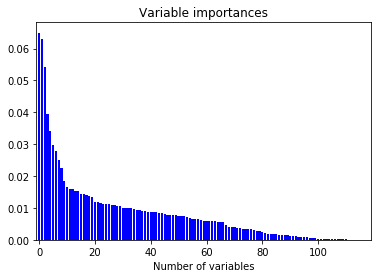

In [34]:
#Plot the feature importances of the forest (rotated)
plt.figure()
plt.title("Variable importance")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", align="center")

#Edited here (put top_k in range)
#plt.xticks(range(X_train.shape[1]))
#Edited here (put top_k)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Number of variables')
plt.show()

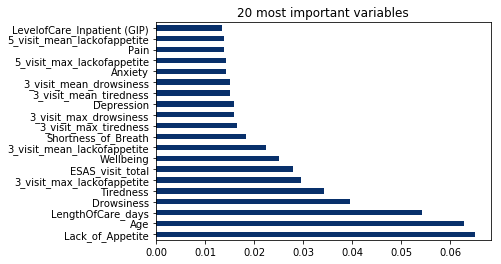

In [60]:
#top 20 horizontal
feat_importances = pd.Series(forest_med.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh', colormap='Blues_r', title = '20 most important variables')

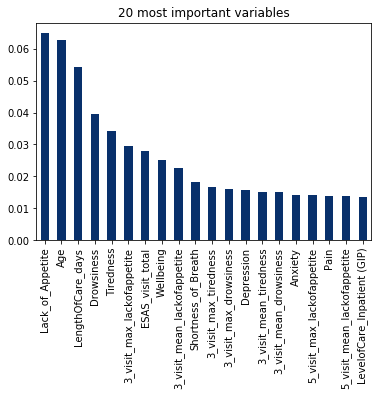

In [61]:
#top 20 vertical
feat_importances.plot(kind='bar', colormap='Blues_r', title = '20 most important variables')